<a href="https://colab.research.google.com/github/mohammadrahmani98/C-path/blob/main/KNN%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 1** - k-NN classifier

**Duration: 6 hours**

**Exercise 1 - Synthetic dataset**

In this exercise, you will employ a synthetic dataset (file Lab1_Ex_1_Synthtetic.hdf5), containing labelled training data and test data for two classes. For each example the first two columns represent the features, while the last column represents the label.

Task: your task is to implement a k-NN classifier, which calculates the probability that a given test example belongs to each class, and outputs a class label as the class with the highest probability. You will evaluate the classifier performance computing the average classification accuracy (i.e. the fraction of test examples that have been classified correctly in respect to the full test set).

In particular, you should perform the following:

*   Train a k-NN classifier for different values of k.
*   Compare accuracy on the training set and the test set. Calculating accuracy of the training set means that you will have to classify each sample in the training set as if it were a test sample; one expects that classification of training samples will perform well, and this may also be used to validate your implementation. Accuracy is defined as the ratio between the number of test samples that are correctly classified, and the total number of test samples. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set. Create a second graph to show the evolution of the accuracy for different values of k over the train set and compare the two.

*   Identifying overfitting and underfitting in the obtained results. 

Note that, for this computer lab, you do not need to employ a validation set.

**Other indications:**
*   The student is required to implement the k-NN algorithm from scratch. Only the numpy library is allowed, while other libraries such as scikit_learn are forbidden.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from google.colab import drive
drive.mount('/content/drive')

#Implement a function to compute the Euclidean distance between two vectors, and one to implement the k-NN algorithm by:
#   - Taking a sample 
#   - Computing all the distances between the sample element and the elements of the training set
#   - sort the the training set based on the distances to the element (the use of functions like np.argsort is allowed)
#   - select the top k elements in terms of distance
#   - evaluate to which class the majority of these k elements belongs to (e.g., it is possible to use the function np.unique with the option return_counts=True and the function np.argmax)

Mounted at /content/drive


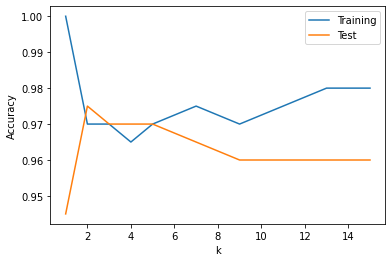

k = 1, training accuracy = 1.0000, test accuracy = 0.9450
k = 2, training accuracy = 0.9700, test accuracy = 0.9750
k = 3, training accuracy = 0.9700, test accuracy = 0.9700
k = 4, training accuracy = 0.9650, test accuracy = 0.9700
k = 5, training accuracy = 0.9700, test accuracy = 0.9700
k = 7, training accuracy = 0.9750, test accuracy = 0.9650
k = 9, training accuracy = 0.9700, test accuracy = 0.9600
k = 11, training accuracy = 0.9750, test accuracy = 0.9600
k = 13, training accuracy = 0.9800, test accuracy = 0.9600
k = 15, training accuracy = 0.9800, test accuracy = 0.9600


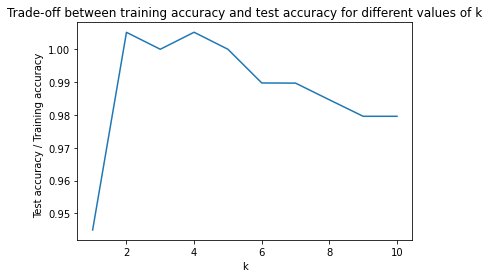

In [3]:
#Change the path to match the position of your file
#The Dataset can be loaded using thhe file option in Google Colab (the directory icon on the left)
import h5py
import numpy as np

# Load the dataset
Dataset1 = h5py.File('/content/drive/MyDrive/BBC/hey.hdf5')
Data = np.array(Dataset1.get('Dataset'))

# Split the dataset into training and test sets
X_train = Data[:200, :-1]
y_train = Data[:200, -1]
X_test = Data[200:, :-1]
y_test = Data[200:, -1]

# Define the distance metric
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Define the k-NN classifier
def predict(X_train, y_train, X_test, k):
    y_pred = []

    for i in range(len(X_test)):
        distances = []
        for j in range(len(X_train)):
            dist = euclidean_distance(X_test[i], X_train[j])
            distances.append((dist, y_train[j]))
        distances.sort(key=lambda x: x[0])
        neighbors = distances[:k]
        labels = [n[1] for n in neighbors]
        y_pred.append(max(set(labels), key=labels.count))

    return np.array(y_pred)

# Evaluate the k-NN classifier on the training and test sets for different values of k
ks = [1,2, 3,4 , 5, 7, 9, 11, 13, 15]
train_accs = []
test_accs = []

for k in ks:
    # Predict labels for the training and test sets
    y_train_pred = predict(X_train, y_train, X_train, k)
    y_test_pred = predict(X_train, y_train, X_test, k)

    # Calculate the accuracy on the training and test sets
    train_acc = np.mean(y_train_pred == y_train)
    test_acc = np.mean(y_test_pred == y_test)

    train_accs.append(train_acc)
    test_accs.append(test_acc)

# Plot the accuracy as a function of k
import matplotlib.pyplot as plt
plt.plot(ks, train_accs, label='Training')
plt.plot(ks, test_accs, label='Test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# showing the data of the plot means accuracy plos for training and tess coressponding to the K
for i in range(len(ks)):
    print(f"k = {ks[i]}, training accuracy = {train_accs[i]:.4f}, test accuracy = {test_accs[i]:.4f}")

accuracy_ratio = [test_accs[i] / train_accs[i] for i in range(len(test_accs))]

plt.plot(range(1, 11), accuracy_ratio)
plt.xlabel('k')
plt.ylabel('Test accuracy / Training accuracy  ')
plt.title('Trade-off between training accuracy and test accuracy for different values of k')
plt.show()







# New Section

# Methodology
Based on the result here, the test and train accurucu can clearly show the time that our algorithm have highest accurcy and performance. To be more clear for K value selectionin KNN classifier we do required o find the postion that the test dataset experincedthe highest valuse, but also we have to consider a trade offf among the test and traing accurcy. For doing so a gaph containig the ration of the test to train accuray implemented. This done for diffrent value of k. 


---


# K value selection
Regarding the first plot the K value ( which show the how many neighbors will be checked to determine the classification of a specific query point), the value 2 show the highest accurcy to test data set, On he other side with taking more closer look at the the plot "Trade-off between training accuracy and test accuracy for different values of k" we can undrestand that this trade off isin the highest  postion at calue 4. 


---


# Overfitting and underfitting 
Based on what we observed, we can select k=3 as the optimum value for KNN classifier. also in the caase of overfitting and underfitting ,we do have ovefitting weh nthe training accurcy increasing but the system is not good at new data in test dataset. 

In ddition the underfitting is happend at the starting point of the the first plot k=5 when the performance on the training and test is poor. In the case of the overfitting, the poorperformance on the test and have good result on trainng can clearly demonstrate the overfiitng. This happen from the K=8 to K=14.
 

**Exercise 2 - Wine dataset**

*Part 1*

In this exercise, a real problem will be examined. The dataset used in this exercise was derived from wine quality dataset from the work "*Modeling wine preferences by data mining from physicochemical properties*" by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 

For each element of the dataset 11 features are provided, representing different wine characteristics, such as density, pH and alcholic content, and the final column consists of a quality evaluation on a scale from 1 to 10. More information can be found at https://archive.ics.uci.edu/ml/datasets/wine+quality.

A subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. The objective is to: 
*   Predict the wine quality over the test set using the k-NN algorithm and evaluating the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

*Part 2*

The prediction of the wine quality could also be framed as a regression. Estimate the accuracy and the Mean Square Error achieved using linear resgression. For this task is possible to use the library sklearn and the function linear_model.LinearRegression() 

In [ ]:
#Part 1

Dataset2 = h5py.File('/content/Lab1_Ex_2_wine.hdf5')

Data = np.array(Dataset2.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

NameError: ignored

In [ ]:
#Part 2
from sklearn import linear_model
clf = linear_model.LinearRegression()

#To be completed by the student

**Student's comments to exercise 2**

*Add comments to the results of Exercise 2 here (may use LateX for formulas if needed).*

**Exercise 3: Phoneme Dataset**

In this exercise the Phoneme dataset is examined https://catalog.ldc.upenn.edu/LDC93s1. Each line represents 256 samples gathered at a 16 kHz of different speech signals. The objective is to classify wether the sound emitted is a "sh", "iy", "dcl", "aa", "ao" phoneme.  

Again, a subset of the dataset containing 400 elements is provided. Create a training set and a test set of 200 samples each. 


*   Classify the samples which compose the test set using the k-NN algorithm and evaluate the prediction accuracy for different values of k. Create a graph using the matplotlib library showing the evolution of the accuracy for different values of k over the test set.
*   Identifying overfitting and underfitting in the obtained results. 

In [ ]:
Dataset3 = h5py.File('/content/Lab1_Ex_3.hdf5')

Data = np.array(Dataset3.get('Dataset'))

Train_Set = Data[:200,:] 
Test_Set = Data[200:,:] 

#To be completed by the student

**Student's comments to exercise 3**

*Add comments to the results of Exercise 3 here (may use LateX for formulas if needed).*